In [1]:
# 1. Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Add channel dimension (for grayscale images)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# 3. Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 4. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# 5. Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 68s 39ms/step - accuracy: 0.8311 - loss: 0.5189 - val_accuracy: 0.9827 - val_loss: 0.0550
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9681 - loss: 0.1041 - val_accuracy: 0.9863 - val_loss: 0.0448
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9757 - loss: 0.0801 - val_accuracy: 0.9890 - val_loss: 0.0399
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9804 - loss: 0.0654 - val_accuracy: 0.9913 - val_loss: 0.0309
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.9817 - loss: 0.0586 - val_accuracy: 0.9923 - val_loss: 0.0282


In [9]:
# 6. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9880 - loss: 0.0295
Test Accuracy: 0.9912


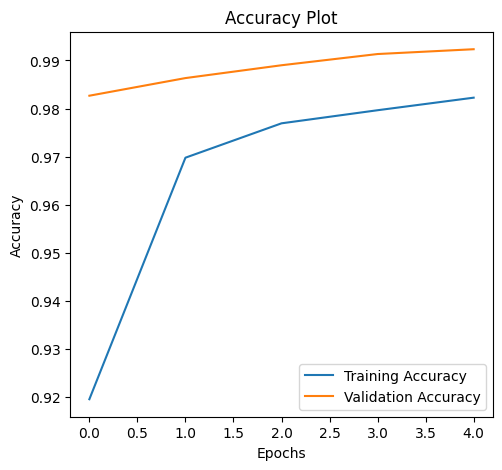

In [10]:
# 7. Plotting training and validation accuracy and loss
# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

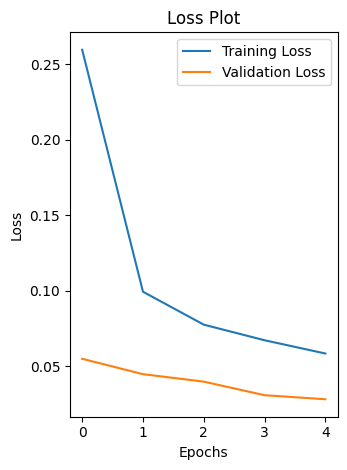

In [11]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()